<a href="https://colab.research.google.com/github/Gabriele90/ML-for-histopathology/blob/main/CNN%20models%20to%20identify%20lung%20squamous%20cell%20carcinoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

This study aims to classify image patches derived from histological images of lung cancer patients. All images (15000 files) in this repository are derived from formalin-fixed paraffin-embedded (FFPE) diagnostic slides ("DX" at the GDC data portal).


**Dataset description**

This dataset contains 15.000 histopathological images with 3 classes. All images are 768 x 768 pixels in size and are in jpeg file format.
The images were generated from an original sample of HIPAA compliant and validated sources, consisting of 750 total images of lung tissue:

250 benign lung tissue,

250 lung adenocarcinomas,

250 lung squamous cell carcinomas.

Images were augmented to 15.000 using the Augmentor package

**Objectives**

To classify the 3 classes of images, I decided to compare 3 different Neural Networks:

Inception V1

Convolutional Neural Networks

Inception V3

**The best performance has been achieved using the InceptionV1 model with a validation accuracy of 99% and validation loss of 0.02%. **

**Importing the required libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import os 
import tqdm
import glob
import tensorflow 

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import grey2rgb


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import os 
import tqdm
import glob
import tensorflow 

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import grey2rgb

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from keras import optimizers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

from tensorflow.keras.metrics import Metric
from typeguard import typechecked
from typing import Optional

import cv2
import random
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator

**Splitting the dataset in training, test and validation set using splitfolders**

In [3]:
#!pip install split_folders
#import splitfolders

In [4]:
#input_folder = '/content/drive/MyDrive/lung_image_sets'
#output_folder = '/content/drive/MyDrive/output_lung'

In [5]:
#splitfolders.ratio(input_folder, output_folder, seed=1337, ratio=(.8, .1, .1), group_prefix=None) 

**Setting the working directories**

In [6]:
#set the path to the main dir
import os
main_dir = "/content/drive/MyDrive/output_lung"
#set the path to the train dir
train_dir = os.path.join(main_dir,'train')
#set the path to the test dir
test_dir = os.path.join(main_dir,'test')
#set the path to the val dir
val_dir = os.path.join(main_dir,'val')
#directory with the training adenocarcinoma images
train_aca_dir = os.path.join(train_dir, 'lung_aca')
#directory with the training benign tissue images
train_n_dir = os.path.join(train_dir, 'lung_n')
#directory with the training lung squamous cell carcinoma images
train_scc_dir = os.path.join(train_dir, 'lung_scc')
#directory with the test adenocarcinoma images
test_aca_dir = os.path.join(test_dir, 'lung_aca')
#directory with the test benign tissue imagess
test_n_dir = os.path.join(test_dir, 'lung_n')
#directory with the test lung squamous cell carcinoma images
test_scc_dir = os.path.join(test_dir, 'lung_scc')
#directory with the validation adenocarcinoma images
val_aca_dir = os.path.join(val_dir, 'lung_aca')
#directory with the validation benign tissue images
val_n_dir = os.path.join(val_dir, 'lung_n')
#directory with the validation lung squamous cell carcinoma images
val_scc_dir = os.path.join(val_dir, 'lung_scc')

In [7]:
train_aca_names = os.listdir(train_aca_dir)
print(train_aca_names[:5])

train_n_names = os.listdir(train_n_dir)
print(train_n_names[:5])

train_scc_names = os.listdir(train_scc_dir)
print(train_scc_names[:5])

test_aca_names = os.listdir(test_aca_dir)
print(test_aca_names[:5])

test_n_names = os.listdir(test_n_dir)
print(train_n_names[:5])

test_scc_names = os.listdir(test_scc_dir)
print(test_scc_names[:5])

val_aca_names = os.listdir(val_aca_dir)
print(val_aca_names[:5])

val_n_names = os.listdir(val_n_dir)
print(val_n_names[:5])

val_scc_names = os.listdir(val_scc_dir)
print(val_scc_names[:5])

['lungaca439.jpeg', 'lungaca4375.jpeg', 'lungaca4382.jpeg', 'lungaca4389.jpeg', 'lungaca4379.jpeg']
['lungn4399.jpeg', 'lungn4385.jpeg', 'lungn4370.jpeg', 'lungn4395.jpeg', 'lungn4402.jpeg']
['lungscc4367.jpeg', 'lungscc439.jpeg', 'lungscc4389.jpeg', 'lungscc4380.jpeg', 'lungscc4395.jpeg']
['lungaca1019.jpeg', 'lungaca1014.jpeg', 'lungaca101.jpeg', 'lungaca1.jpeg', 'lungaca10.jpeg']
['lungn4399.jpeg', 'lungn4385.jpeg', 'lungn4370.jpeg', 'lungn4395.jpeg', 'lungn4402.jpeg']
['lungscc1.jpeg', 'lungscc10.jpeg', 'lungscc101.jpeg', 'lungscc1019.jpeg', 'lungscc1014.jpeg']
['lungaca1009.jpeg', 'lungaca1013.jpeg', 'lungaca1036.jpeg', 'lungaca108.jpeg', 'lungaca1094.jpeg']
['lungn1013.jpeg', 'lungn1009.jpeg', 'lungn1036.jpeg', 'lungn1094.jpeg', 'lungn108.jpeg']
['lungscc1009.jpeg', 'lungscc1013.jpeg', 'lungscc1036.jpeg', 'lungscc1094.jpeg', 'lungscc108.jpeg']


In [8]:
#print the total no of images present in each dir
print("Total images in the training set:", len(train_aca_names+train_n_names+train_scc_names))
print("Total images in the test set:", len(test_aca_names+test_n_names+test_scc_names))
print("Total images in the val set:", len(val_aca_names+val_n_names+val_scc_names))

Total images in the training set: 12000
Total images in the test set: 1500
Total images in the val set: 1500


**Data visualization**

In [9]:
#training
train_aca_names = os.listdir(train_aca_dir)
print(train_aca_names[:5])
train_n_names = os.listdir(train_n_dir)
print(train_n_names[:5])
train_scc_names = os.listdir(train_scc_dir)
print(train_scc_names[:5])
#test
test_aca_names = os.listdir(test_aca_dir)
print(test_aca_names[:5])
test_n_names = os.listdir(test_n_dir)
print(test_n_names[:5])
test_scc_names = os.listdir(test_scc_dir)
print(test_scc_names[:5])
#val
val_aca_names = os.listdir(val_aca_dir)
print(val_aca_names[:5])
val_n_names = os.listdir(val_n_dir)
print(val_n_names[:5])
val_scc_names = os.listdir(val_scc_dir)
print(val_scc_names[:5])

['lungaca439.jpeg', 'lungaca4375.jpeg', 'lungaca4382.jpeg', 'lungaca4389.jpeg', 'lungaca4379.jpeg']
['lungn4399.jpeg', 'lungn4385.jpeg', 'lungn4370.jpeg', 'lungn4395.jpeg', 'lungn4402.jpeg']
['lungscc4367.jpeg', 'lungscc439.jpeg', 'lungscc4389.jpeg', 'lungscc4380.jpeg', 'lungscc4395.jpeg']
['lungaca1019.jpeg', 'lungaca1014.jpeg', 'lungaca101.jpeg', 'lungaca1.jpeg', 'lungaca10.jpeg']
['lungn1019.jpeg', 'lungn103.jpeg', 'lungn101.jpeg', 'lungn1014.jpeg', 'lungn1.jpeg']
['lungscc1.jpeg', 'lungscc10.jpeg', 'lungscc101.jpeg', 'lungscc1019.jpeg', 'lungscc1014.jpeg']
['lungaca1009.jpeg', 'lungaca1013.jpeg', 'lungaca1036.jpeg', 'lungaca108.jpeg', 'lungaca1094.jpeg']
['lungn1013.jpeg', 'lungn1009.jpeg', 'lungn1036.jpeg', 'lungn1094.jpeg', 'lungn108.jpeg']
['lungscc1009.jpeg', 'lungscc1013.jpeg', 'lungscc1036.jpeg', 'lungscc1094.jpeg', 'lungscc108.jpeg']


In [10]:
#get the filenames from the aca,n and scc dir of the train dataset
aca_pic =[os.path.join(train_aca_dir, filename) for filename in train_aca_names[0:4]]
n_pic =[os.path.join(train_n_dir, filename) for filename in train_n_names[0:4]]
scc_pic =[os.path.join(train_scc_dir, filename) for filename in train_scc_names[0:4]]

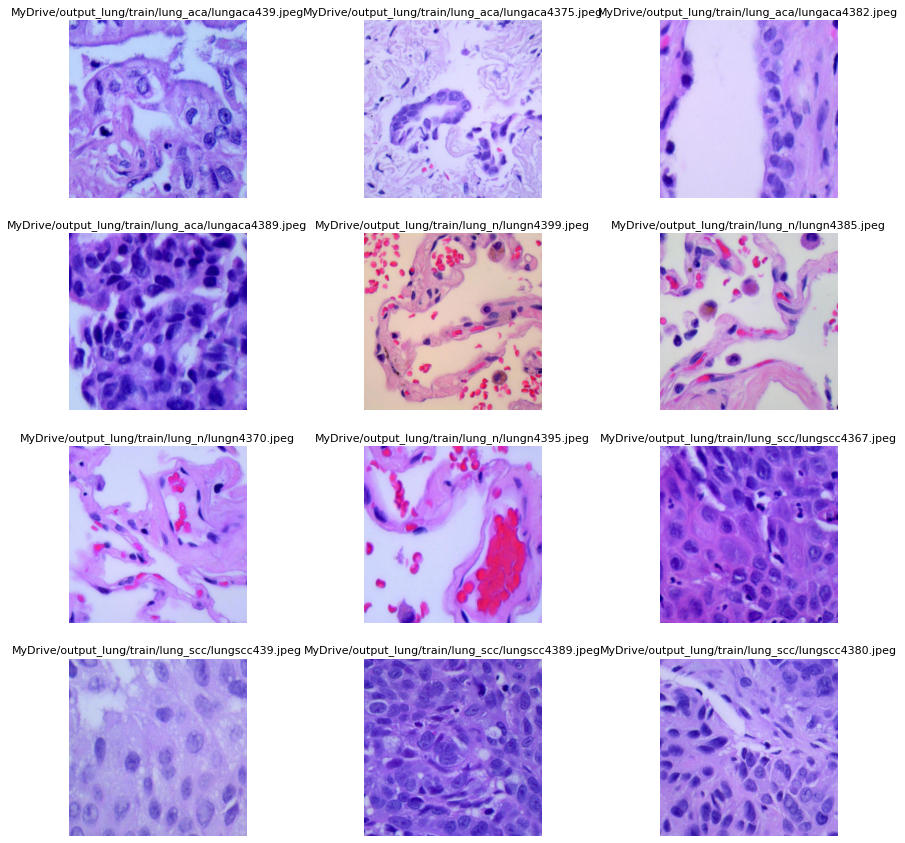

In [11]:
import matplotlib.pyplot as plt
# plot a grid of 12 images (4 images of each class)
import matplotlib.image as mpimg
#set the number of columns and rows
rows = 4
cols = 3
#set the figure size
fig = plt.gcf()
fig.set_size_inches(15,15)
#merge the covid and normal list
merged_list = aca_pic+n_pic+scc_pic
for i , img_path in enumerate(merged_list):
  data= img_path.split('/', 3)[3] 
  sp = plt.subplot(rows, cols, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize=11)
  plt.imshow(img,cmap='gray') 

  plt.show

**Resizing all images and creating the variables x and y**

In [12]:
x = []
y = []

for i in tqdm(os.listdir(train_aca_dir)):
    path = os.path.join(train_aca_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Lung adenocarcinoma')

for i in tqdm(os.listdir(train_n_dir)):
    path = os.path.join(train_n_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Lung benign tissue')

for i in tqdm(os.listdir(train_scc_dir)):
    path = os.path.join(train_scc_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Lung squamous cell carcinoma')

100%|██████████| 4000/4000 [22:31<00:00,  2.96it/s]


In [13]:
for i in tqdm(os.listdir(test_aca_dir)):
    path = os.path.join(test_aca_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Lung adenocarcinoma')

for i in tqdm(os.listdir(test_n_dir)):
    path = os.path.join(test_n_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Lung benign tissue')

for i in tqdm(os.listdir(test_scc_dir)):
    path = os.path.join(test_scc_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Lung squamous cell carcinoma')

100%|██████████| 500/500 [02:49<00:00,  2.95it/s]


In [14]:
x = np.array(x)
y = np.array(y)
x.shape,y.shape

((13500, 224, 224, 3), (13500,))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


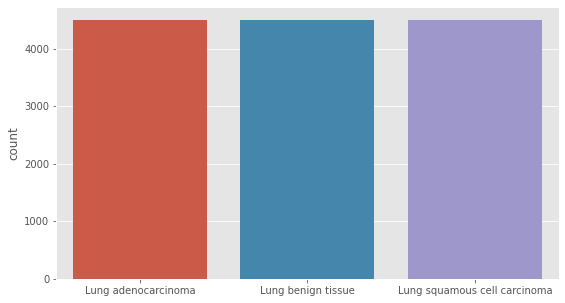

In [15]:
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(9,5))
sns.countplot(y)
plt.show()

**Data labelling**

In [16]:
y

array(['Lung adenocarcinoma', 'Lung adenocarcinoma',
       'Lung adenocarcinoma', ..., 'Lung squamous cell carcinoma',
       'Lung squamous cell carcinoma', 'Lung squamous cell carcinoma'],
      dtype='<U28')

In [17]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [18]:
y = to_categorical(y)#num_classes = 3
y.shape

(13500, 3)

**Data splitting**

When developing a deep learning-based method, using a rigorous evaluation process is essential to avoid overfitting to training data or the generation of fake information. In order to evaluate the performance of the network, it is generally recommended to split data into training, valid, and test sets. The training set data are used to determine the network parameters. In most cases, the network shows good performance for the training set after

In [19]:
from sklearn.utils import shuffle
x,y = shuffle(x,y)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
y_test.shape

(2700, 3)

**Data Augmentation**

The amount of data gathered was very low and could cause the models to under-fit. Hence, we would use a brilliant technique of Data Augmentation to increase the amount of data. This technique relies on rotations, flips, change in exposure, etc to create similar images. Using this technique we can increase the size of data by a high factor. The output image of the cropping stage is given as input to ImageDataGenerator which is a function in keras.preprocessing.image library. This function takes multiple arguments that decide how Augmentation takes place.

In [22]:
# generate training,testing and validation batches 
dgen_train = ImageDataGenerator(rescale =1./255,
                                validation_split=0.2,
                                zoom_range = 0.2,
                                horizontal_flip =True)
dgen_validation = ImageDataGenerator(rescale = 1./255)
dgen_test = ImageDataGenerator(rescale =1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(224,224),
                                                 subset='training',
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_generator = dgen_train.flow_from_directory(val_dir,
                                                 target_size=(224,224),
                                                 subset='validation',
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_generator = dgen_test.flow_from_directory(test_dir,
                                                 target_size=(224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 9600 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


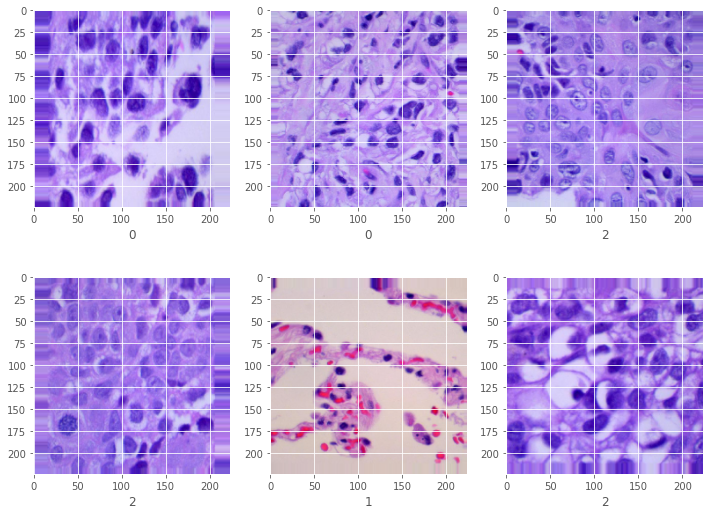

In [23]:
from tensorflow.keras.preprocessing import image
sample_x,sample_y = next(train_generator)
plt.figure(figsize=(12,9))
for i in range(6):
    plt.subplot(2,3,i+1)
    sample = image.array_to_img(sample_x[i])
    plt.xlabel(np.argmax(sample_y[i]))
    plt.imshow(sample)
plt.show()

In [24]:
#get the class indices
train_generator.class_indices

{'lung_aca': 0, 'lung_n': 1, 'lung_scc': 2}

In [25]:
#get the image shape
train_generator.image_shape

(224, 224, 3)

**InceptionV3 Model**

Our first model is Innception V3 by Google is the 3rd version in a series of Deep Learning Convolutional Architectures. Inception V3 was trained using a dataset of 1,000 classes (See the list of classes here) from the original ImageNet dataset which was trained with over 1 million training images, the Tensorflow version has 1,001 classes which is due to an additional "background' class not used in the original ImageNet. Inception V3 was trained for the ImageNet Large Visual Recognition Challenge where it was a first runner up.

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as numpy
import matplotlib.pyplot as pyplot
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape=(224,224,3), 
                   include_top=False,
                   weights="imagenet")

87916544/87910968 [==============================] - 1s 0us/step


In [28]:
# Freezing Layers

for layer in base_model.layers:
    layer.trainable=False

In [29]:
model_1=Sequential()
model_1.add(base_model)
model_1.add(Dropout(0.5))
model_1.add(tf.keras.layers.GlobalAveragePooling2D())
model_1.add(Flatten())
model_1.add(BatchNormalization())
model_1.add(Dense(64,kernel_initializer='he_uniform'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(64,kernel_initializer='he_uniform'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(64,kernel_initializer='he_uniform'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(32,kernel_initializer='he_uniform'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(32,kernel_initializer='he_uniform'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Dense(3,activation='softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 2048)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
batch_normalization_94 (Batc (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 64)                131136    
_________________________________________________________________
batch_normalization_95 (Batc (None, 64)                2

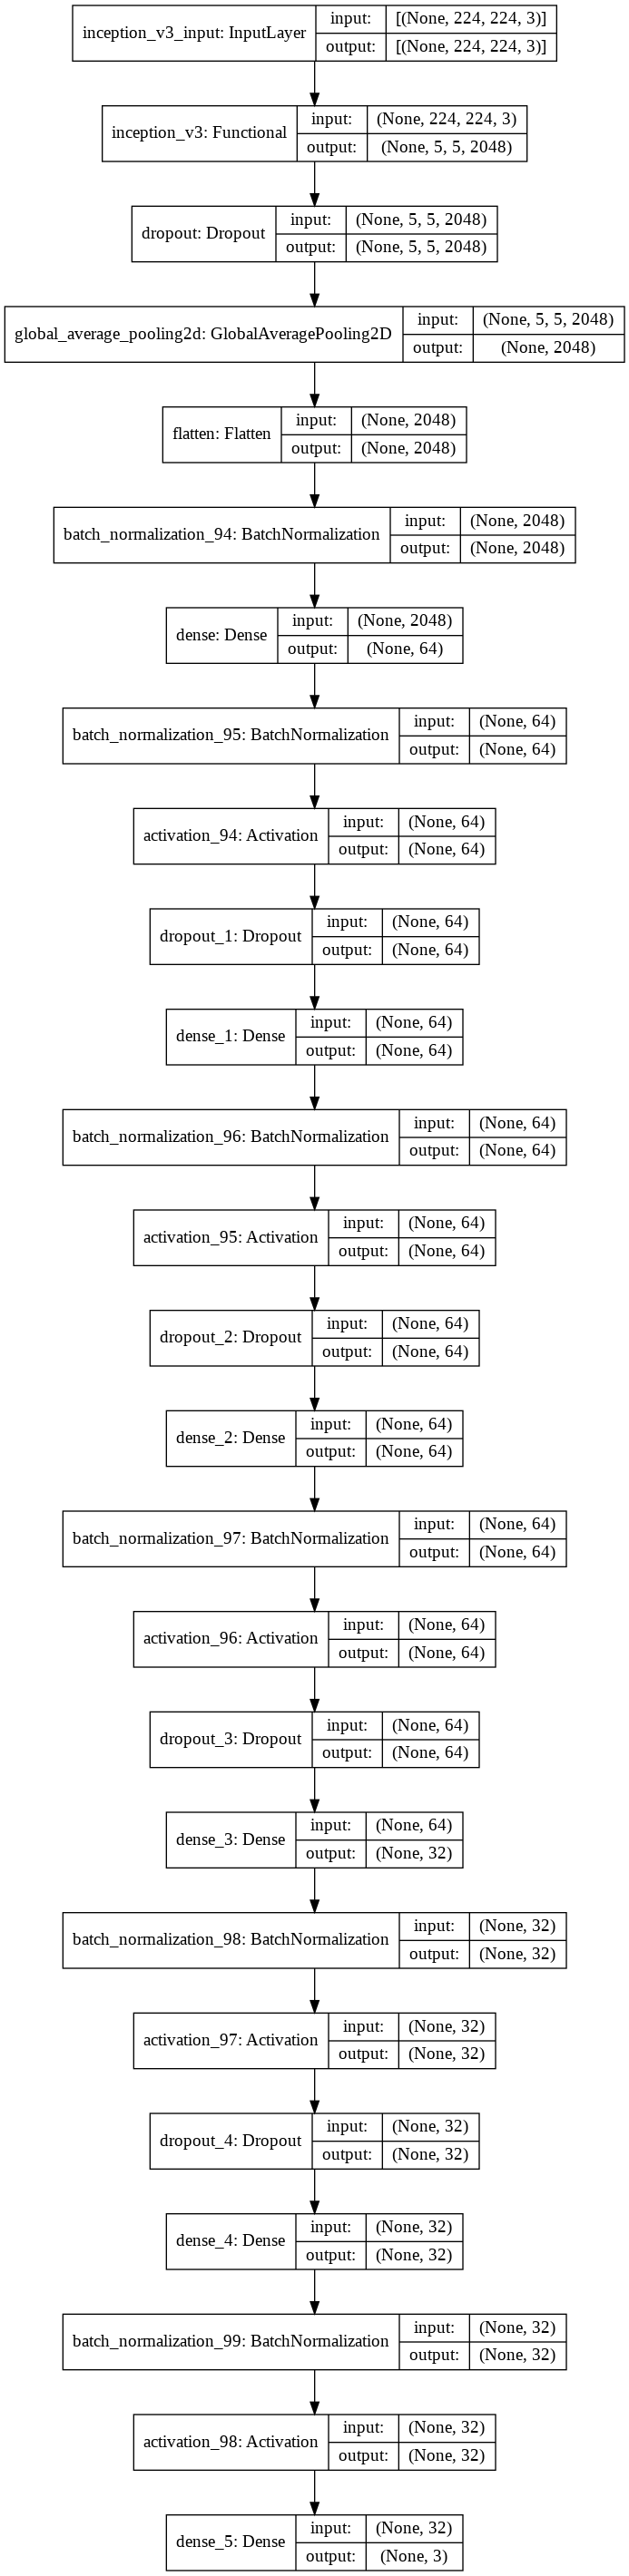

In [30]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, 'InceptionV3 model.png', show_shapes=True)

**Convolutional Neural Network**

ConvNet, was the second architecture in this study and consisted of two convolutional layers (32 and 64 filters), 1 flatten layer and two fully connected layers (256 and 3 neurons). It was the lightest architecture considered in this study.

In [31]:
model_2 = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model_2.add(Conv2D(32,(5,5), padding='SAME', activation='relu', input_shape=(224,224,3)))
# pooling layer
model_2.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model_2.add(Dropout(0.5))
# add another convolutional layer
model_2.add(Conv2D(64,(5,5), padding='SAME', activation='relu'))
# pooling layer
model_2.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model_2.add(Dropout(0.5))
# Flatten layer
model_2.add(Flatten())
# add a dense layer : amount of nodes, activation
model_2.add(Dense(256, activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model_2.add(Dropout(0.5))
model_2.add(Dense(3,activation='softmax'))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 224, 224, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 112, 112, 64)      51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)           

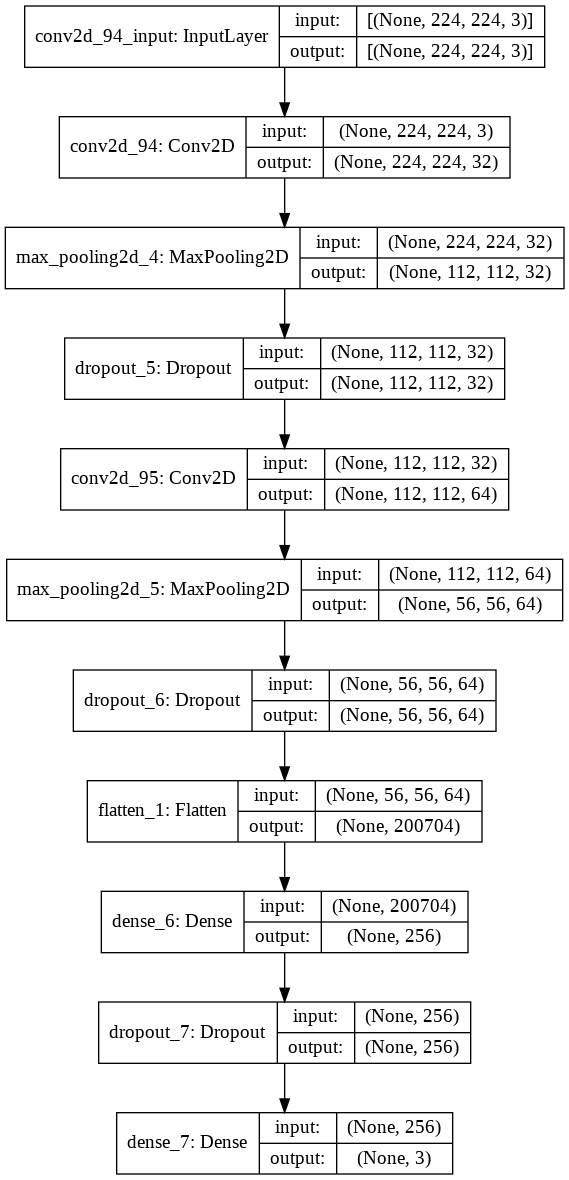

In [32]:
from tensorflow.keras.utils import plot_model
plot_model(model_2, 'CNN model.png', show_shapes=True)

**InceptionV1**

This model limits the number of input channels by adding an extra 1x1 convolution before the 3x3 and 5x5 convolutions. Though adding an extra operation may seem counterintuitive, 1x1 convolutions are far more cheaper than 5x5 convolutions, and the reduced number of input channels also help. Do note that however, the 1x1 convolution is introduced after the max pooling layer, rather than before.

In [33]:
def inception(x,
              filters_1x1,
              filters_3x3_reduce,
              filters_3x3,
              filters_5x5_reduce,
              filters_5x5,
              filters_pool):
  path1 = layers.Conv2D(filters_1x1, (1, 1), padding='same',    activation='relu')(x)
  path2 = layers.Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
  path2 = layers.Conv2D(filters_3x3, (1, 1), padding='same', activation='relu')(path2)
  path3 = layers.Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
  path3 = layers.Conv2D(filters_5x5, (1, 1), padding='same', activation='relu')(path3)
  path4 = layers.MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
  path4 = layers.Conv2D(filters_pool, (1, 1), padding='same', activation='relu')(path4)
  return tf.concat([path1, path2, path3, path4], axis=3)

In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model

In [35]:
inp = layers.Input(shape=(224, 224, 3))
input_tensor = layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=(224,224,3))(inp)
x = layers.Conv2D(64, 7, strides=2, padding='same', activation='relu')(input_tensor)
x = layers.MaxPooling2D(3, strides=2)(x)
x = layers.Conv2D(64, 1, strides=1, padding='same', activation='relu')(x)
x = layers.Conv2D(192, 3, strides=1, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(3, strides=2)(x)
x = inception(x, filters_1x1=64, filters_3x3_reduce=96, filters_3x3=128, filters_5x5_reduce=16, filters_5x5=32, filters_pool=32)
x = inception(x, filters_1x1=128, filters_3x3_reduce=128, filters_3x3=192, filters_5x5_reduce=32, filters_5x5=96, filters_pool=64)
x = layers.MaxPooling2D(3, strides=2)(x)
x = inception(x, filters_1x1=192, filters_3x3_reduce=96, filters_3x3=208, filters_5x5_reduce=16, filters_5x5=48, filters_pool=64)
aux1 = layers.AveragePooling2D((5, 5), strides=3)(x)
aux1 =layers.Conv2D(128, 1, padding='same', activation='relu')(aux1)
aux1 = layers.Flatten()(aux1)
aux1 = layers.Dense(1024, activation='relu')(aux1)
aux1 = layers.Dropout(0.7)(aux1)
aux1 = layers.Dense(3, activation='softmax')(aux1)
x = inception(x, filters_1x1=160, filters_3x3_reduce=112, filters_3x3=224, filters_5x5_reduce=24, filters_5x5=64, filters_pool=64)
x = inception(x, filters_1x1=128, filters_3x3_reduce=128, filters_3x3=256, filters_5x5_reduce=24, filters_5x5=64, filters_pool=64)
x = inception(x, filters_1x1=112, filters_3x3_reduce=144, filters_3x3=288, filters_5x5_reduce=32, filters_5x5=64, filters_pool=64)
aux2 = layers.AveragePooling2D((5, 5), strides=3)(x)
aux2 =layers.Conv2D(128, 1, padding='same', activation='relu')(aux2)
aux2 = layers.Flatten()(aux2)
aux2 = layers.Dense(1024, activation='relu')(aux2)
aux2 = layers.Dropout(0.7)(aux2) 
aux2 = layers.Dense(3, activation='softmax')(aux2)
x = inception(x, filters_1x1=256, filters_3x3_reduce=160, filters_3x3=320, filters_5x5_reduce=32, filters_5x5=128, filters_pool=128)
x = layers.MaxPooling2D(3, strides=2)(x)
x = inception(x, filters_1x1=256, filters_3x3_reduce=160, filters_3x3=320, filters_5x5_reduce=32, filters_5x5=128, filters_pool=128)
x = inception(x, filters_1x1=384, filters_3x3_reduce=192, filters_3x3=384, filters_5x5_reduce=48, filters_5x5=128, filters_pool=128)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)
out = layers.Dense(3, activation='softmax')(x)

In [36]:
model_3 = Model(inputs = inp, outputs = [out, aux1, aux2])

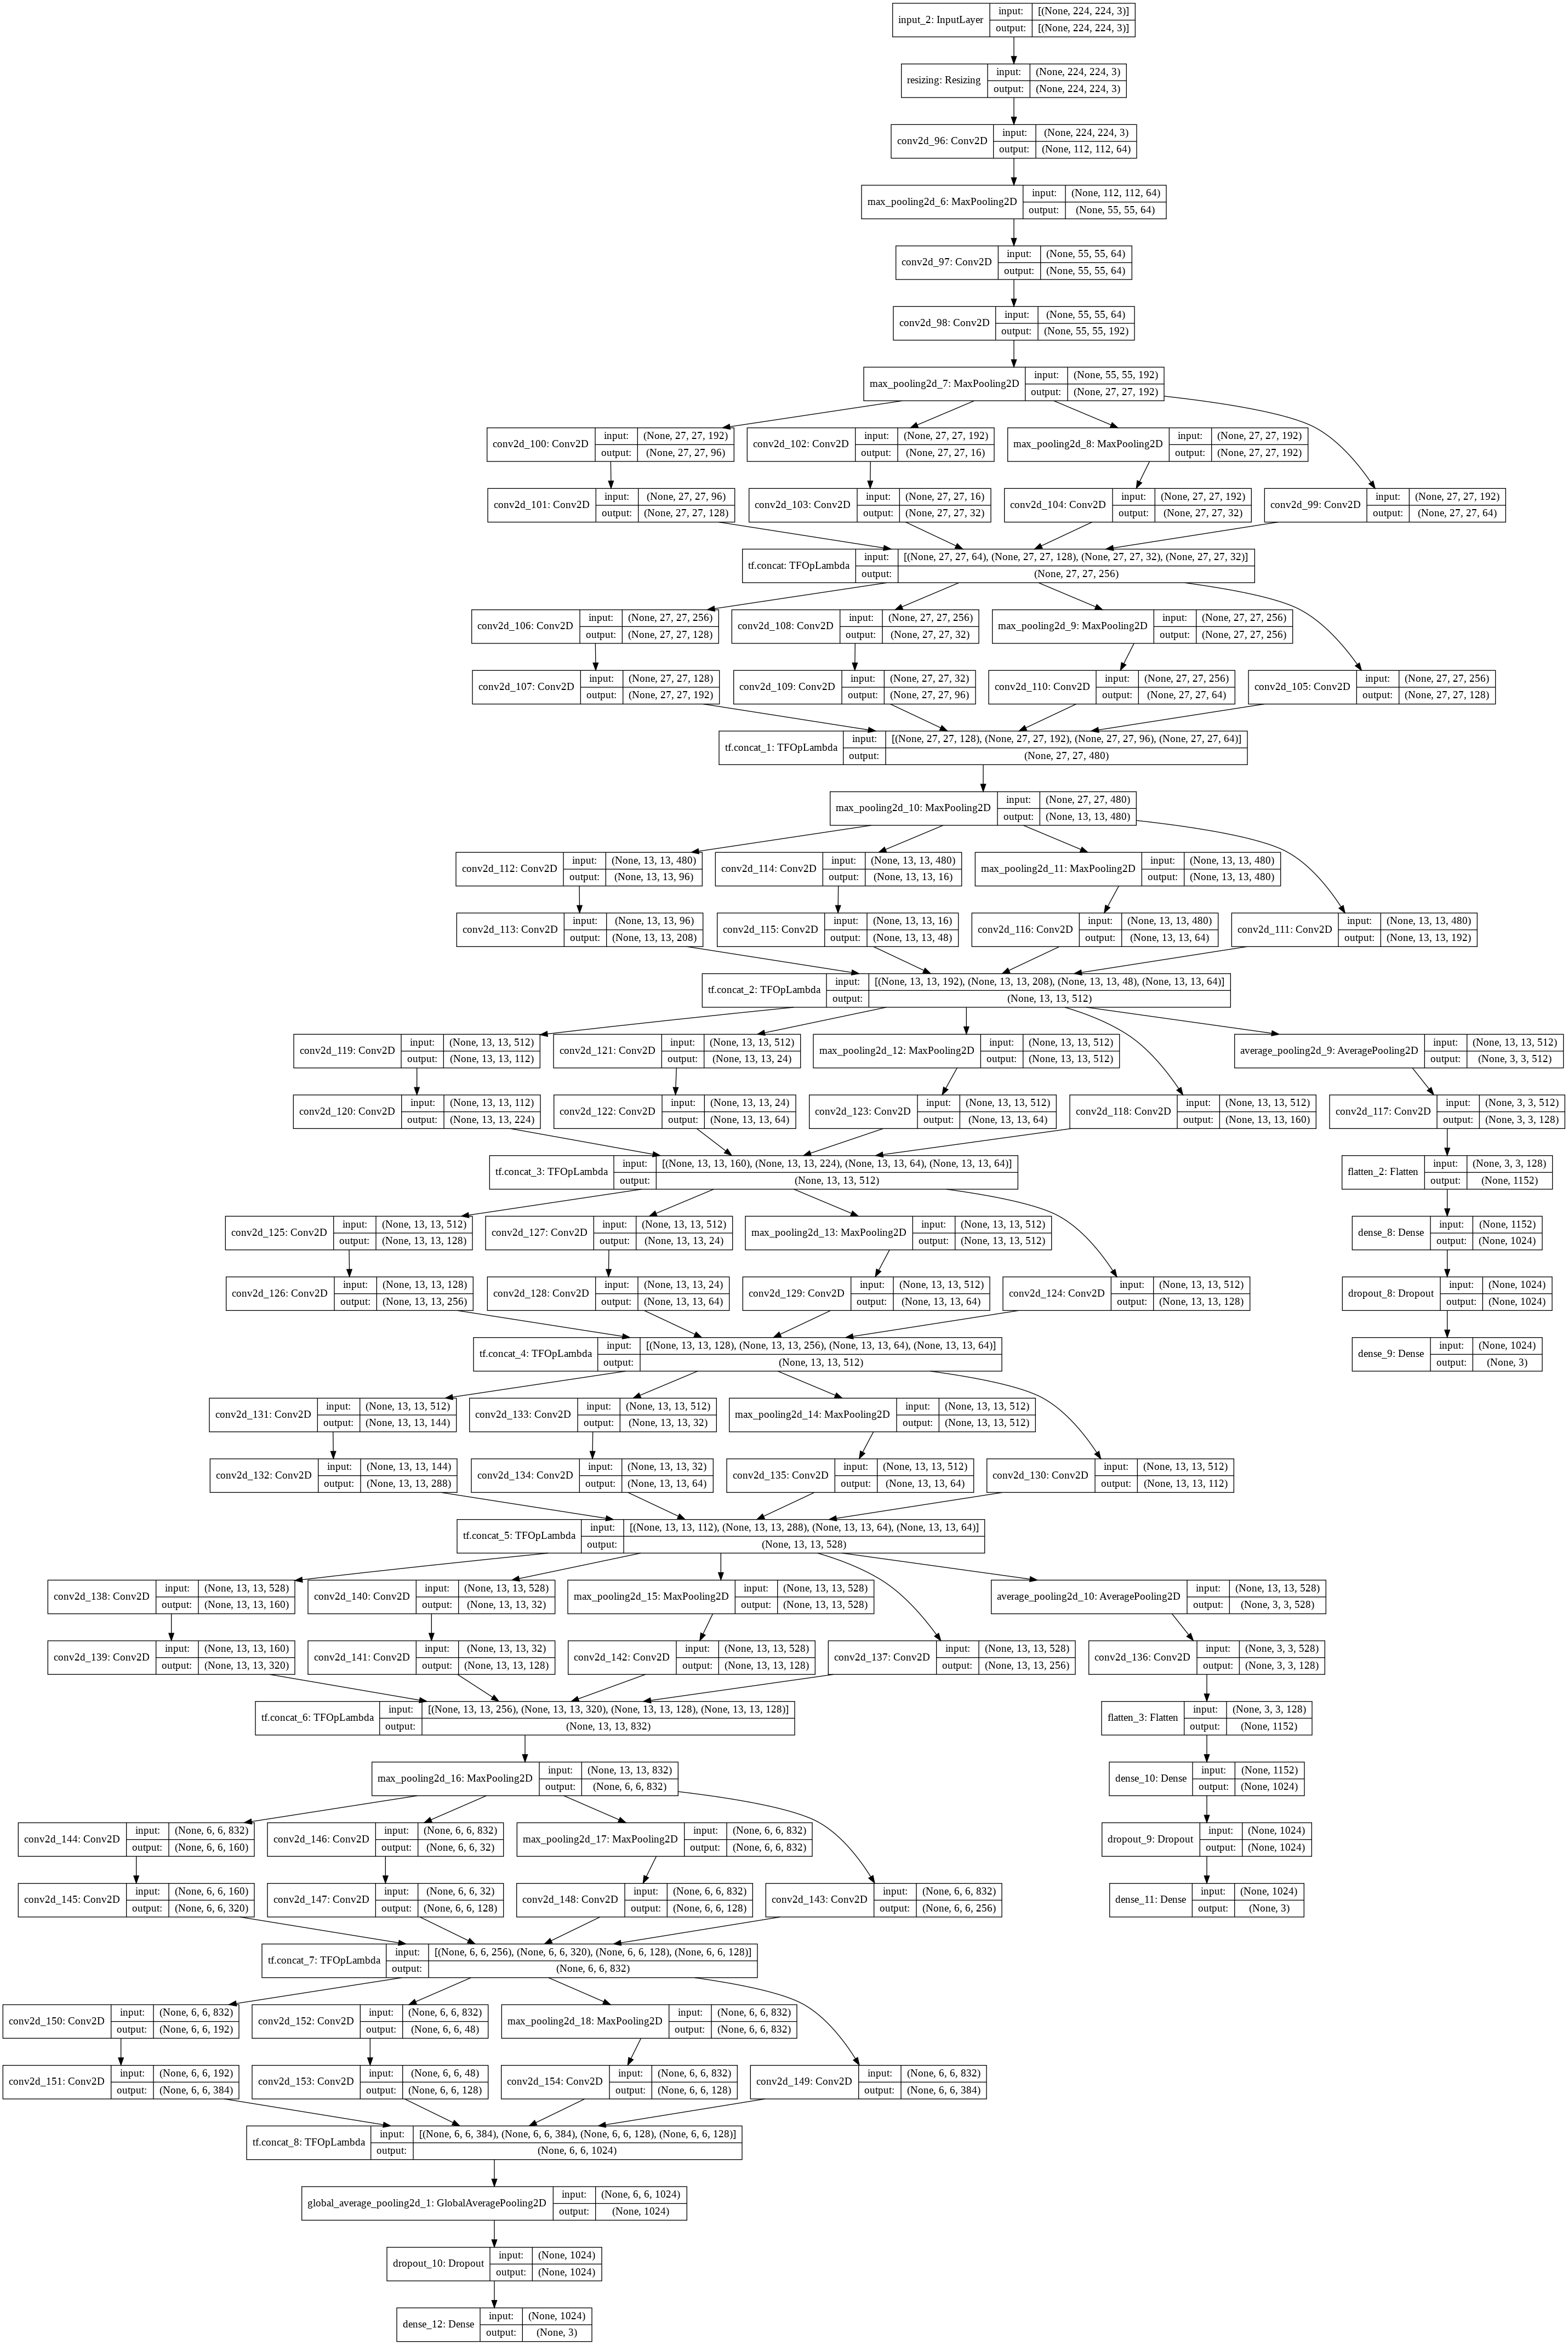

In [37]:
from tensorflow.keras.utils import plot_model
plot_model(model_3, 'InceptionV1.png', show_shapes=True)

**Compiling the 3 models**

In [38]:
from tensorflow.keras.optimizers import Adam

In [39]:
model_1.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])
model_2.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])
model_3.compile(optimizer='adam', 
              loss=['categorical_crossentropy',
                    'categorical_crossentropy',
                    'categorical_crossentropy'],
                loss_weights=[1, 0.3, 0.3],
                metrics=['accuracy'])

In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint_1 = ModelCheckpoint( "InceptionV3" ,monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr_1 = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)
checkpoint_2 = ModelCheckpoint( "CNN2" ,monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr_2 = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)


In [41]:
history_1 = model_1.fit(x_train,y_train,epochs=50,validation_data = (x_test,y_test),verbose=1,
                              callbacks=[checkpoint_1,reduce_lr_1])

Epoch 1/50
338/338 [==============================] - 69s 93ms/step - loss: 1.4124 - accuracy: 0.3344 - val_loss: 1.0574 - val_accuracy: 0.3589

Epoch 00001: val_accuracy improved from -inf to 0.35889, saving model to InceptionV3
INFO:tensorflow:Assets written to: InceptionV3/assets
Epoch 2/50
338/338 [==============================] - 29s 86ms/step - loss: 1.2047 - accuracy: 0.3689 - val_loss: 1.0328 - val_accuracy: 0.3752

Epoch 00002: val_accuracy improved from 0.35889 to 0.37519, saving model to InceptionV3
INFO:tensorflow:Assets written to: InceptionV3/assets
Epoch 3/50
338/338 [==============================] - 30s 88ms/step - loss: 1.1262 - accuracy: 0.3961 - val_loss: 1.0054 - val_accuracy: 0.5178

Epoch 00003: val_accuracy improved from 0.37519 to 0.51778, saving model to InceptionV3
INFO:tensorflow:Assets written to: InceptionV3/assets
Epoch 4/50
338/338 [==============================] - 30s 90ms/step - loss: 1.0407 - accuracy: 0.4548 - val_loss: 0.9610 - val_accuracy: 0.530

In [42]:
history_2 = model_2.fit(x_train,y_train,epochs=50,validation_data = (x_test,y_test),verbose=1,
                              callbacks=[checkpoint_2,reduce_lr_2])

Epoch 1/50
338/338 [==============================] - 24s 67ms/step - loss: 199.8348 - accuracy: 0.5127 - val_loss: 0.9210 - val_accuracy: 0.3185

Epoch 00001: val_accuracy improved from -inf to 0.31852, saving model to CNN2
INFO:tensorflow:Assets written to: CNN2/assets
Epoch 2/50
338/338 [==============================] - 22s 66ms/step - loss: 0.8140 - accuracy: 0.6088 - val_loss: 1.0163 - val_accuracy: 0.3163

Epoch 00002: val_accuracy did not improve from 0.31852
Epoch 3/50
338/338 [==============================] - 22s 66ms/step - loss: 0.7607 - accuracy: 0.6277 - val_loss: 0.9388 - val_accuracy: 0.3385

Epoch 00003: val_accuracy improved from 0.31852 to 0.33852, saving model to CNN2
INFO:tensorflow:Assets written to: CNN2/assets
Epoch 4/50
338/338 [==============================] - 22s 66ms/step - loss: 0.7272 - accuracy: 0.6384 - val_loss: 1.1501 - val_accuracy: 0.3252

Epoch 00004: val_accuracy did not improve from 0.33852
Epoch 5/50
338/338 [==============================] - 2

In [43]:
history_3 = model_3.fit(x_train, [y_train, y_train, y_train], validation_data=(x_test, [y_test, y_test, y_test]), batch_size=32, epochs=50, verbose=1)

Epoch 1/50
338/338 [==============================] - 41s 107ms/step - loss: 1.4426 - dense_12_loss: 0.7989 - dense_9_loss: 1.3415 - dense_11_loss: 0.8041 - dense_12_accuracy: 0.6296 - dense_9_accuracy: 0.6340 - dense_11_accuracy: 0.6179 - val_loss: 0.5734 - val_dense_12_loss: 0.3468 - val_dense_9_loss: 0.3495 - val_dense_11_loss: 0.4060 - val_dense_12_accuracy: 0.8437 - val_dense_9_accuracy: 0.8863 - val_dense_11_accuracy: 0.8167
Epoch 2/50
338/338 [==============================] - 33s 97ms/step - loss: 0.4219 - dense_12_loss: 0.2558 - dense_9_loss: 0.2856 - dense_11_loss: 0.2679 - dense_12_accuracy: 0.8973 - dense_9_accuracy: 0.8847 - dense_11_accuracy: 0.8923 - val_loss: 0.3465 - val_dense_12_loss: 0.2197 - val_dense_9_loss: 0.2094 - val_dense_11_loss: 0.2132 - val_dense_12_accuracy: 0.9215 - val_dense_9_accuracy: 0.9215 - val_dense_11_accuracy: 0.9226
Epoch 3/50
338/338 [==============================] - 33s 97ms/step - loss: 0.3466 - dense_12_loss: 0.2109 - dense_9_loss: 0.2390 -

**Model Performance Evaluation**


In [44]:
#get the keys of history object
history_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [45]:
history_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [46]:
history_3.history.keys()

dict_keys(['loss', 'dense_12_loss', 'dense_9_loss', 'dense_11_loss', 'dense_12_accuracy', 'dense_9_accuracy', 'dense_11_accuracy', 'val_loss', 'val_dense_12_loss', 'val_dense_9_loss', 'val_dense_11_loss', 'val_dense_12_accuracy', 'val_dense_9_accuracy', 'val_dense_11_accuracy'])

In [47]:
epochs=50

In [48]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

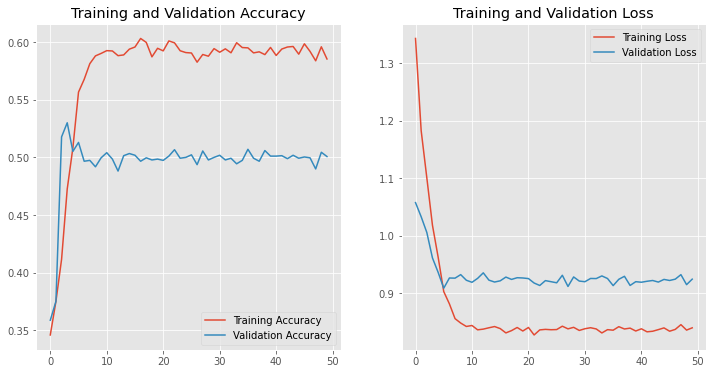

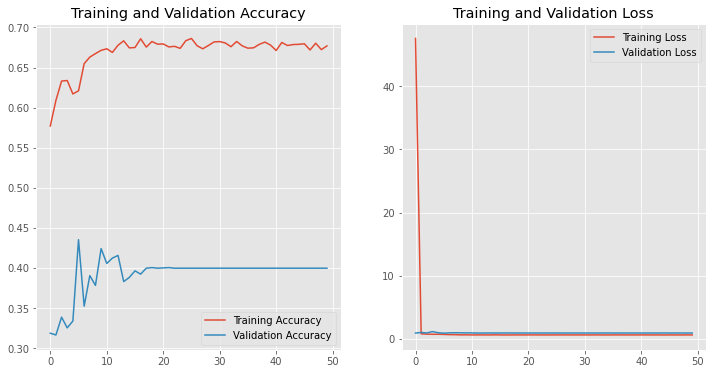

In [49]:
plot_history(history_1)
plot_history(history_2)

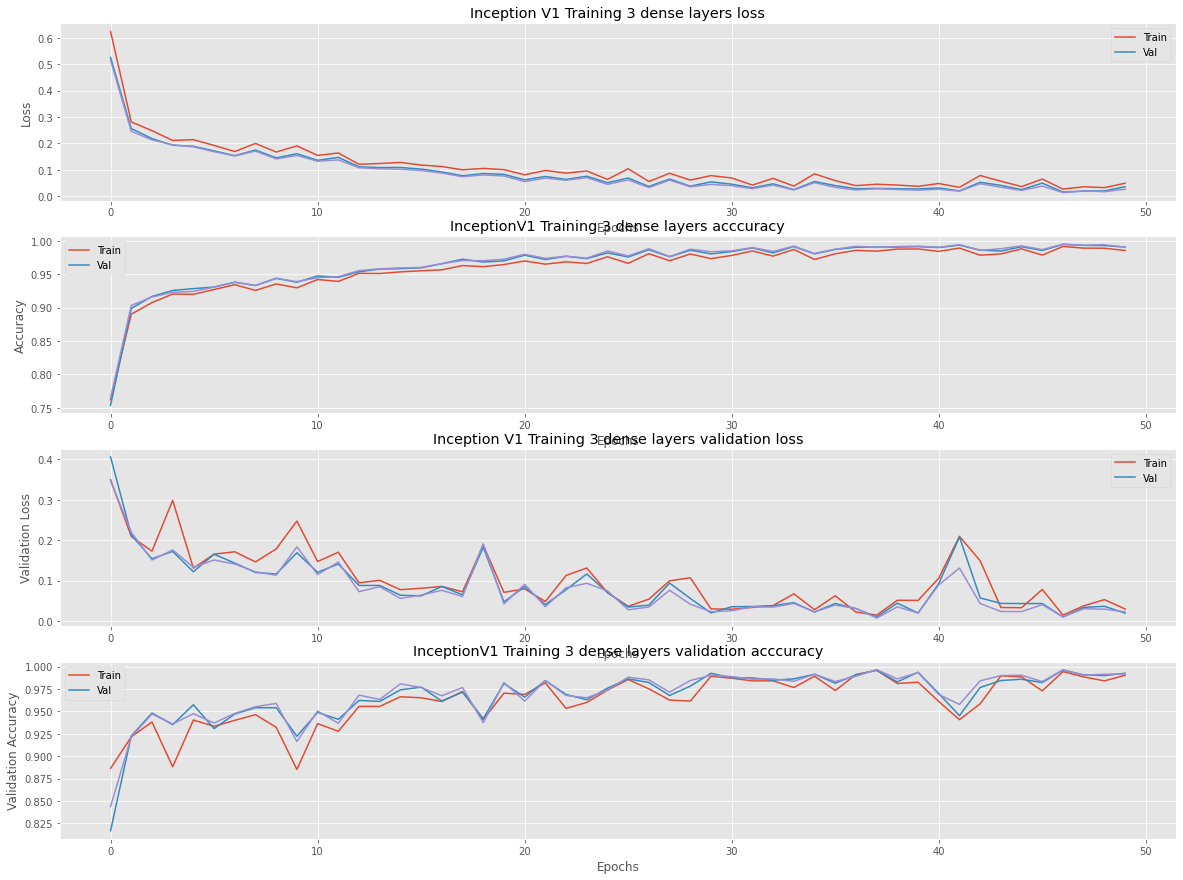

In [51]:
fig, axs = plt.subplots(4, 1, figsize=(20,15))
axs[0].plot(history_3.history['dense_9_loss'])
axs[0].plot(history_3.history['dense_11_loss'])
axs[0].plot(history_3.history['dense_12_loss'])
axs[0].title.set_text('Inception V1 Training 3 dense layers loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])

axs[1].plot(history_3.history['dense_9_accuracy'])
axs[1].plot(history_3.history['dense_11_accuracy'])
axs[1].plot(history_3.history['dense_12_accuracy'])
axs[1].title.set_text('InceptionV1 Training 3 dense layers acccuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

axs[2].plot(history_3.history['val_dense_9_loss'])
axs[2].plot(history_3.history['val_dense_11_loss'])
axs[2].plot(history_3.history['val_dense_12_loss'])
axs[2].title.set_text('Inception V1 Training 3 dense layers validation loss')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Validation Loss')
axs[2].legend(['Train','Val'])

axs[3].plot(history_3.history['val_dense_9_accuracy'])
axs[3].plot(history_3.history['val_dense_11_accuracy'])
axs[3].plot(history_3.history['val_dense_12_accuracy'])
axs[3].title.set_text('InceptionV1 Training 3 dense layers validation acccuracy')
axs[3].set_xlabel('Epochs')
axs[3].set_ylabel('Validation Accuracy')
axs[3].legend(['Train', 'Val'])

**Assessing metrics performance scores**

In [52]:
print('InceptionV3 acc:', history_1.history['accuracy'][-1])
print('CNN acc:', history_2.history['accuracy'][-1])
print('1st layer InceptionV1 acc:', history_3.history['dense_9_accuracy'][-1])
print('2nd layer InceptionV1 acc:', history_3.history['dense_11_accuracy'][-1])
print('3rd InceptionV1 acc:', history_3.history['dense_12_accuracy'][-1])

InceptionV3 acc: 0.585277795791626
CNN acc: 0.6770370602607727
1st layer InceptionV1 acc: 0.9856481552124023
2nd layer InceptionV1 acc: 0.9908333420753479
3rd InceptionV1 acc: 0.9903703927993774


In [53]:
print('InceptionV3 loss:', history_1.history['loss'][-1])
print('CNN loss:', history_2.history['loss'][-1])
print('1st layer InceptionV1 loss:', history_3.history['dense_9_loss'][-1])
print('2nd layer InceptionV1 loss:', history_3.history['dense_11_loss'][-1])
print('3rd InceptionV1 loss:', history_3.history['dense_12_loss'][-1])

InceptionV3 loss: 0.8393651247024536
CNN loss: 0.6260725855827332
1st layer InceptionV1 loss: 0.049200400710105896
2nd layer InceptionV1 loss: 0.0359269380569458
3rd InceptionV1 loss: 0.02658918872475624


In [54]:
print('InceptionV3 val acc:', history_1.history['val_accuracy'][-1])
print('CNN validation val acc:', history_2.history['val_accuracy'][-1])
print('1st layer InceptionV1 val acc:', history_3.history['val_dense_9_accuracy'][-1])
print('2nd layer InceptionV1 val acc:', history_3.history['val_dense_11_accuracy'][-1])
print('3rd InceptionV1 val acc:', history_3.history['val_dense_12_accuracy'][-1])

InceptionV3 val acc: 0.5007407665252686
CNN validation val acc: 0.3996296226978302
1st layer InceptionV1 val acc: 0.9903703927993774
2nd layer InceptionV1 val acc: 0.9925925731658936
3rd InceptionV1 val acc: 0.9918518662452698


In [55]:
print('InceptionV3 val loss:', history_1.history['val_loss'][-1])
print('CNN validation val loss:', history_2.history['val_loss'][-1])
print('1st layer InceptionV1 val loss:', history_3.history['val_dense_9_loss'][-1])
print('2nd layer InceptionV1 val loss:', history_3.history['val_dense_11_loss'][-1])
print('3rd InceptionV1 val loss:', history_3.history['val_dense_12_loss'][-1])

InceptionV3 val loss: 0.9241105318069458
CNN validation val loss: 0.9315387010574341
1st layer InceptionV1 val loss: 0.02997116930782795
2nd layer InceptionV1 val loss: 0.019854430109262466
3rd InceptionV1 val loss: 0.023008106276392937


In [56]:
model_1.evaluate(x_test, y_test)

85/85 [==============================] - 6s 71ms/step - loss: 0.9241 - accuracy: 0.5007


[0.9241105318069458, 0.5007407665252686]

In [57]:
model_2.evaluate(x_test, y_test)

85/85 [==============================] - 1s 15ms/step - loss: 0.9315 - accuracy: 0.3996


[0.9315387010574341, 0.3996296226978302]

In [58]:
model_3.evaluate(x_test, y_test)

85/85 [==============================] - 3s 31ms/step - loss: 0.0380 - dense_12_loss: 0.0230 - dense_9_loss: 0.0300 - dense_11_loss: 0.0199 - dense_12_accuracy: 0.9919 - dense_9_accuracy: 0.9904 - dense_11_accuracy: 0.9926


[0.037955790758132935,
 0.023008106276392937,
 0.02997116930782795,
 0.019854430109262466,
 0.9918518662452698,
 0.9903703927993774,
 0.9925925731658936]

As we can see, we got the best overall val_categorical_accuracy, and val_loss with the InceptionV1 (model_3).


**Confusion Matrix**

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

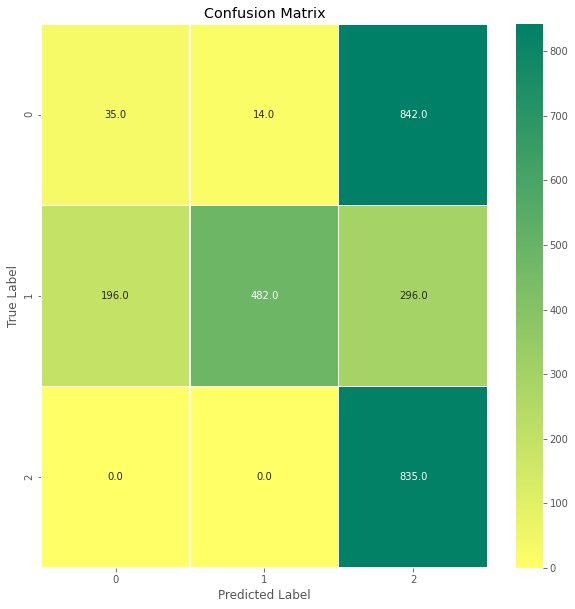

In [66]:
# Predict the values from the test dataset
Y_pred = model_3.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert test observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="summer_r", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Prediction On New Data**

We use the best model, in this case InceptionV1 model, for predicting on new data.

In [68]:
from google.colab import files 
from keras.preprocessing import image
import numpy as np
uploaded = files.upload()
for filename in uploaded.keys():
  img_path ='/content/'+filename
  img = image.load_img(img_path, target_size =(224,224))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis=0)
  prediction = model_3.predict(images)
  print(filename)

  if prediction == 0:
    print('Lung adenocarcinoma')
  elif prediction == 1:
    print('Benign tissue')
  else:
    print('Lung squamous cell carcinoma')

Saving lung squamous carcinoma12.jpeg to lung squamous carcinoma12 (1).jpeg
lung squamous carcinoma12.jpeg
Lung squamous cell carcinoma
